## Stock Price Technical Analysis & Financial Metrics for AAPL
1. Introduction & Setup
Objective: This analysis aims to evaluate historical stock price trends using quantitative technical indicators and financial metrics. We will utilize TA-Lib for signal generation (RSI, MACD) and PyNance for risk metrics.

In [1]:
# Cell 1: Imports & Configuration
import os
import sys
import warnings
import pandas as pd
import yfinance as yf  # Helper to fetch fresh data if CSV is missing

# Add 'scripts' directory to path to allow importing custom modules
sys.path.insert(0, os.path.dirname(os.getcwd()))

# Import Custom Scripts
from scripts.data_loader import DataLoader
from scripts.stock_analysis import TechnicalAnalyzer, StockVisualizer

# Configuration
warnings.filterwarnings('ignore')
DATA_PATH = '../data/yfinance_data/AAPL.csv'
TICKER = 'AAPL'

print("✅ Libraries and Custom Scripts Loaded.")

✅ Libraries and Custom Scripts Loaded.


#### 2. Data Loading and Preparation
We use the DataLoader class to get the raw stock data. Since technical analysis requires specific columns (Open, High, Low, Close, Volume), we ensure the data is formatted correctly.


In [2]:
# Cell 2: Load Data (CSV only, no downloading)

# Ensure the file exists
if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"❌ Data file not found at: {DATA_PATH}")

# Use your existing loader
loader = DataLoader()
stock_df = loader.load_data(DATA_PATH)

# Verify OHLCV data loaded correctly
print(f"Loaded Data Shape: {stock_df.shape}")
print(stock_df.head())


Loaded Data Shape: (3774, 6)
         Date     Close      High       Low      Open      Volume
0  2009-01-02  2.721686  2.730385  2.554037  2.575630   746015200
1  2009-01-05  2.836553  2.884539  2.780469  2.794266  1181608400
2  2009-01-06  2.789767  2.914229  2.770872  2.877641  1289310400
3  2009-01-07  2.729484  2.774170  2.706990  2.753477   753048800
4  2009-01-08  2.780169  2.793666  2.700393  2.712090   673500800


### 3. Technical Analysis with TA-Lib
In this section, we initialize the TechnicalAnalyzer class. This encapsulates the logic for applying complex mathematical indicators to the dataframe.

Indicators Applied:

SMA (Simple Moving Average): We calculate the 20-day (short-term) and 50-day (medium-term) averages to identify trend direction.

RSI (Relative Strength Index): Measures momentum to identify overbought (>70) or oversold (<30) conditions.

MACD (Moving Average Convergence Divergence): A trend-following momentum indicator that shows the relationship between two moving averages of a stock's price.

In [3]:
# Cell 3: Apply TA-Lib Indicators
# Initialize the analyzer with the dataframe
analyzer = TechnicalAnalyzer(stock_df)

# Apply the indicators (SMA, RSI, MACD)
# This modifies the internal dataframe and returns the result
df_analyzed = analyzer.apply_talib_indicators()

# Preview the new technical columns
cols_to_show = ['Close', 'SMA_20', 'SMA_50', 'RSI', 'MACD']
print(df_analyzed[cols_to_show].tail())

[INFO] Calculating TA-Lib technical indicators...
[INFO] Indicators added: SMA_20, SMA_50, RSI, MACD components.
                 Close      SMA_20      SMA_50        RSI      MACD
Date                                                               
2023-12-22  191.788757  191.856618  183.572859  54.672784  2.633141
2023-12-26  191.243912  192.018094  183.858864  53.090049  2.304751
2023-12-27  191.342972  192.154308  184.149424  53.354446  2.029104
2023-12-28  191.768951  192.362839  184.479567  54.540999  1.823998
2023-12-29  190.728775  192.490633  184.814828  51.121347  1.559539


### 4. Financial Metrics with PyNance
We move beyond price trends to analyze risk and return using PyNance. This library is specialized for retrieving and analyzing financial data.

Metrics Calculated:

Volatility: The degree of variation of a trading price series over time.

Sharpe Ratio: The average return earned in excess of the risk-free rate per unit of volatility (a measure of risk-adjusted return).

In [4]:
# Calculate key financial metrics
metrics = analyzer.calculate_financial_metrics()

# ===========================
# Manual Financial Metrics 
# ===========================
print("Financial Metrics Summary")
print("-" * 50)
print(f"Volatility (Annualized): {metrics['volatility']:.2f}%")
print(f"Sharpe Ratio: {metrics['sharpe_ratio']:.2f}")
print(f"Maximum Drawdown: {metrics['max_drawdown']:.2%}")
print("\n")


# ===========================
# PyNance Portfolio Optimizer Results
# ===========================
print("PyNance Portfolio Optimizer Summary")
print("-" * 50)

# ---- Max Sharpe Portfolio ----
print("\n=== Max Sharpe Portfolio (Risk/Return) ===")
print(metrics["max_sharpe_rr"])

print("\n=== Max Sharpe Portfolio Weights ===")
print(metrics["max_sharpe_weights"])

# ---- Minimum Variance Portfolio ----
print("\n=== Minimum Variance Portfolio (Risk/Return) ===")
print(metrics["min_var_rr"])

print("\n=== Minimum Variance Portfolio Weights ===")
print(metrics["min_var_weights"])
print("\n" + "-" * 50)


[INFO] Running PyNance portfolio optimizer calculations...
[INFO] PyNance portfolio optimizer metrics added.
Financial Metrics Summary
--------------------------------------------------
Volatility (Annualized): 0.29%
Sharpe Ratio: 1.14
Maximum Drawdown: -43.80%


PyNance Portfolio Optimizer Summary
--------------------------------------------------

=== Max Sharpe Portfolio (Risk/Return) ===
                   Max Sharpe Portfolio
Expected Return                  75.67%
Standard Deviation               44.39%

=== Max Sharpe Portfolio Weights ===
     Portfolio Weight
AAPL           18.38%
MSFT            0.00%
META            0.00%
NVDA           81.62%
TSLA            0.00%

=== Minimum Variance Portfolio (Risk/Return) ===
                   Min Var Portfolio
Expected Return               20.56%
Standard Deviation            20.26%

=== Minimum Variance Portfolio Weights ===
     Portfolio Weight
AAPL           42.36%
MSFT           55.80%
META            1.84%
NVDA            0.00%


### 5. Visualization
Finally, we use the StockVisualizer class to interpret the data visually. Charts are essential for spotting entry/exit points that raw numbers might miss.

#### A. Price Trend & Moving Averages

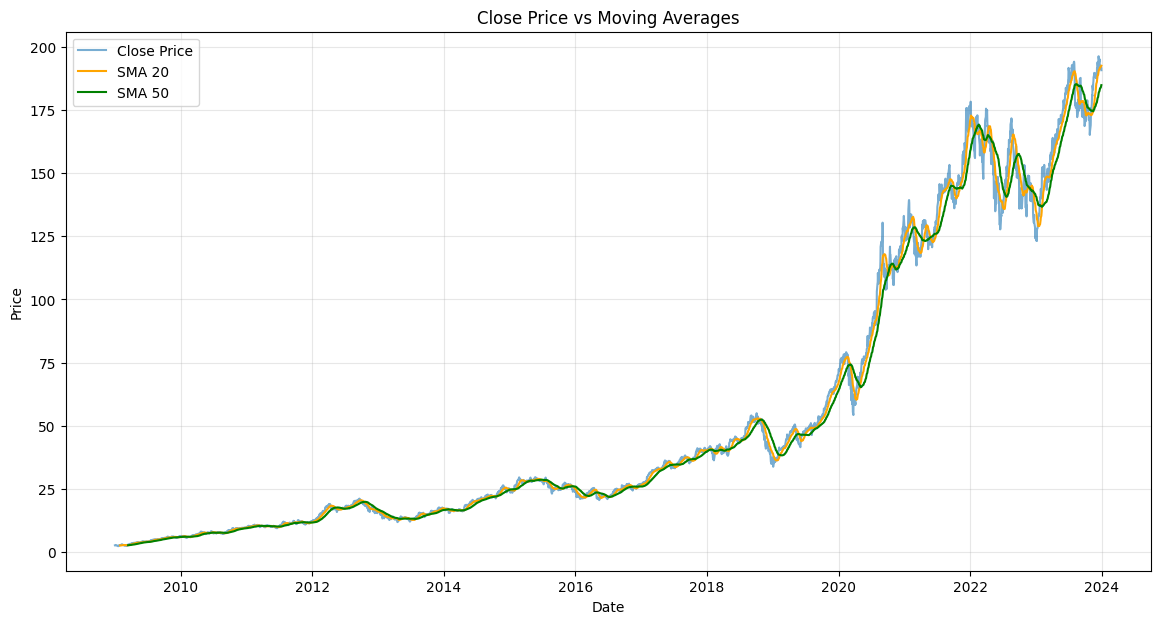

In [5]:
# Cell 5: Plot Price vs. Moving Averages
viz = StockVisualizer(df_analyzed, metrics)
viz.plot_price_and_ma()

#### B. Momentum (RSI)
This plot helps identify potential reversal points.

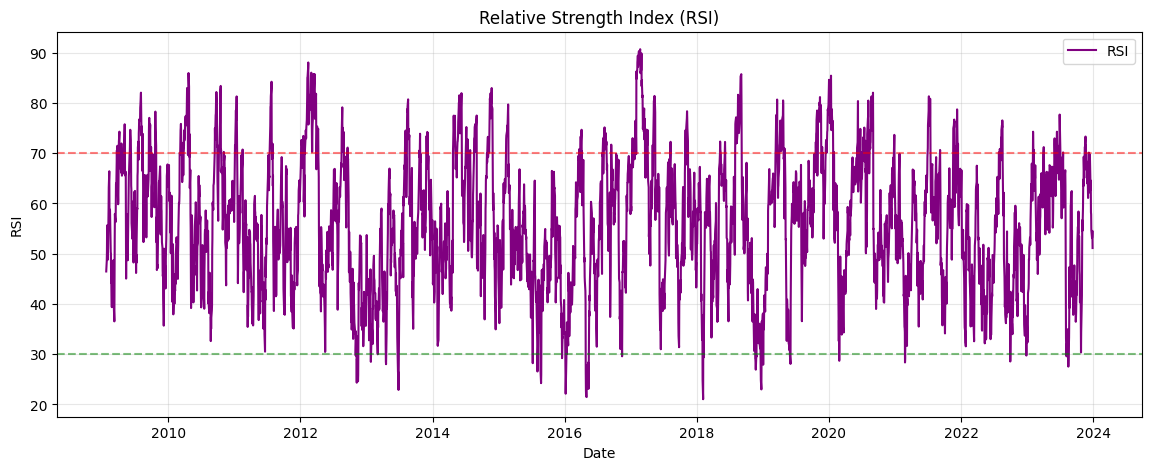

In [6]:
# Cell 6: Plot RSI
viz.plot_rsi()

#### C. Trend Strength (MACD)
This visualizes the convergence and divergence of the moving averages, providing buy/sell signals.

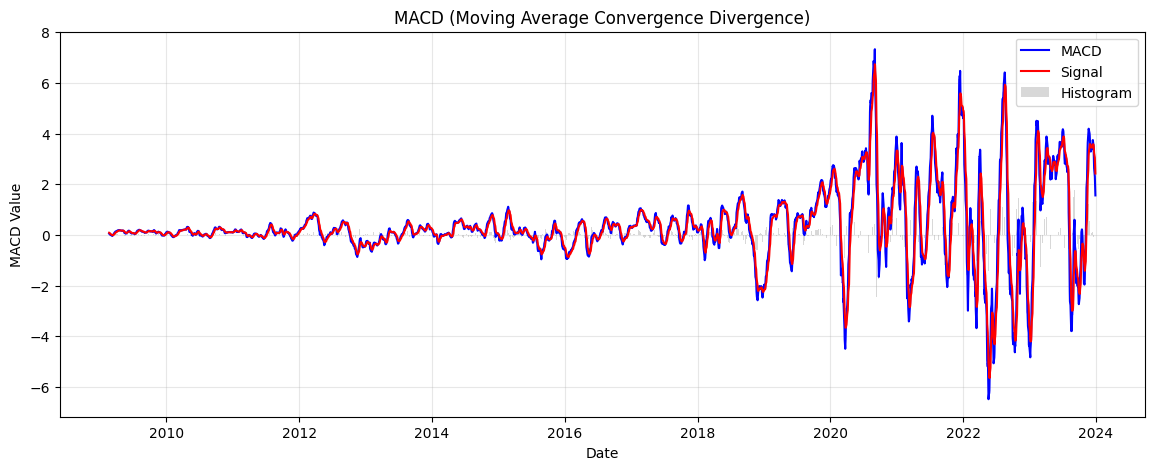

In [7]:
viz.plot_macd()

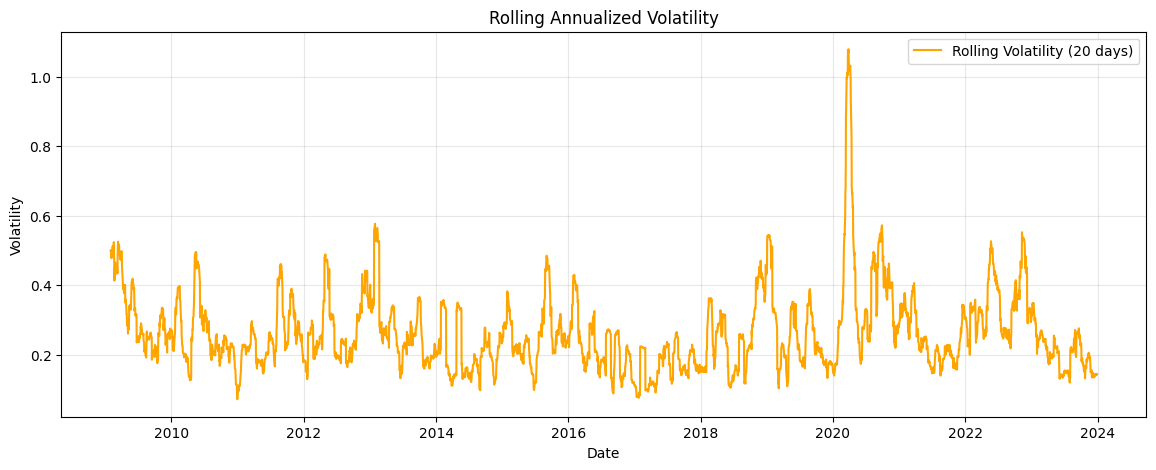

In [8]:
viz.plot_rolling_volatility()

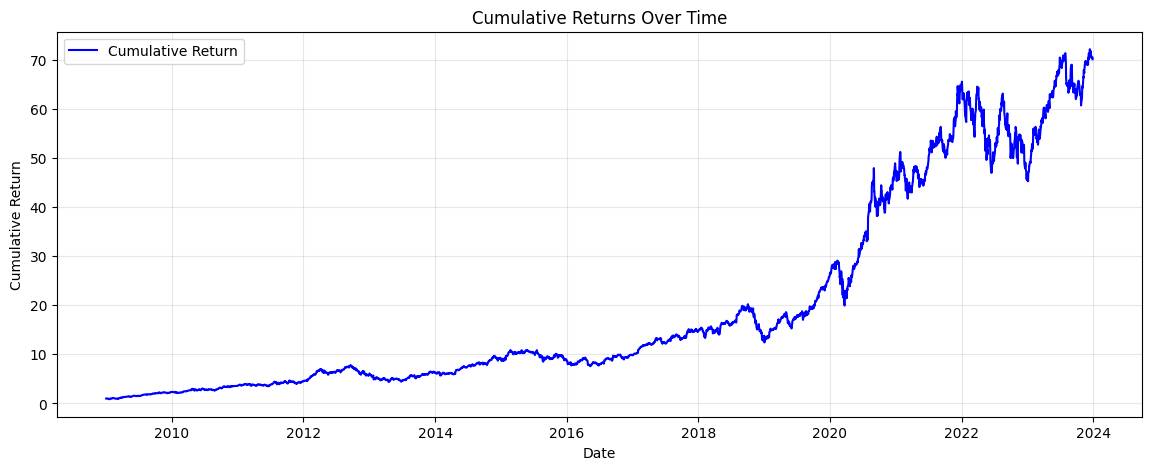

In [9]:
viz.plot_cumulative_returns()